## Project Proposal - Lisa Alhadeff
The dataset I will be using is the Facebook dataset from https://blog.thedataincubator.com/tag/data-sources/. The context is this: companies amass huge numbers of likes. However, liking a company indicates passive interaction with the company: The user clicks a single button, after which posts from the company appear in the user's feed.
However, it is widely known that social media is saturated with advertisement, both conventional and in the form of social media communications. Therefore, facebook “likes” is not a useful metric for a company looking to grow their following and indeed customer base.
The aim is to give  companies an insight as to how active their “followers” are: do they like and buy/interact, or do they like and forget?
By scraping data from the posts in the mentions, and identifying certain stock “positive” and “negative” words, it will be possible to understand better whether “mentions” are by people who have liked the company, or by other users.
In understanding this, the company can try to direct their post such that mentions and active interaction with the company are incentivised.

## Part 1
Initially, I have investigated the relationship between the number of likes, and the number of facebook mentions. This yields the following graph:

https://github.com/LAlhadeff/Lisa_Data_Incubator/blob/master/Full_Data.png
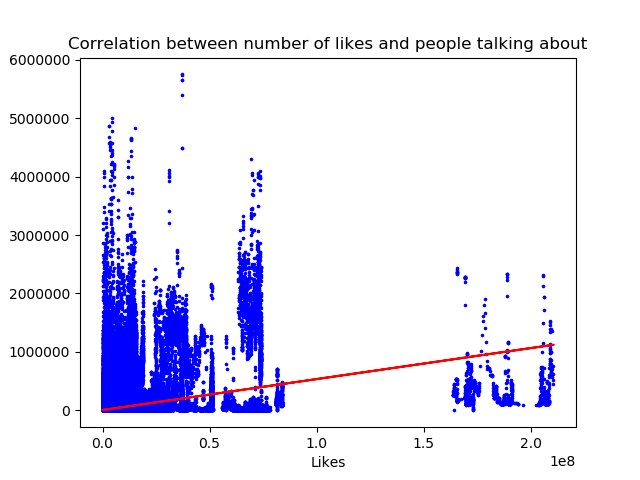

## Code for importing large datasets, and taking columns of interest:

In [ ]:
import re
f = open( 'temp_datalab_records_social_facebook.csv', 'r' )
lines = []
liked = []
talked = []
for line in f:
    cells = line.split( "," ) ## Split into cells
  #  print(cells)
    likes = (cells[6])
    #print(likes)
    liked.append(likes)
    talks = cells[7]
    # talks = cells[7]
    talked.append(talks)
f.close() # Data stored locally so close file

del liked[0]
del talked[0]

with open("likes.txt", 'w') as f:
	for item in liked:
		f.write("%s\n" % item)

with open("talked_about.txt", 'w') as f:
	for item in talked:
		f.write("%s\n" % item)

## Code for producing data on relationship between likes and mentions:

In [ ]:
# importing the required module
from numpy.random import randn
from numpy.random import seed
from numpy import cov 
import matplotlib.pyplot as plt 

f = open( 'likes.txt', 'r' )
f2 = open( 'talked_about.txt', 'r' )

likes = []
talked_about = []

for line in f:
	likes.append(int(line))
for line2 in f2:
	talked_about.append(int(line2))

# importing the required module 
import matplotlib.pyplot as plt 

size = len(likes)
#size = 10
# # x axis values 
x = likes[0:size] 
#x = likes[0:3000]
y = talked_about[0:size]
# # corresponding y axis values 
#y = talked_about[0:3000]

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum   
    a = ybar - b * xbar
    print('best fit line:\ny = {:.4f} + {:.4}x'.format(a, b))
    return(a, b)

# Best fit line
(a, b) = best_fit(x, y)

# plot points and fit line
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10, c='b', marker='.')
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit, c = 'r')
# naming the x axis 
plt.xlabel('Likes') 
# naming the y axis 
plt.ylabel('Talked About') 
  
# giving a title to my graph 
plt.title('Correlation between number of likes and people talking about') 


covariance = cov(x, y)
print("\nCovariance data:")
print(covariance)
# function to show the plot 
plt.show() 

# Consider correlation coefficients: Pearson and Spearmans
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# calculate Pearson's correlation
corr, _ = pearsonr(x, y)
print('\nPearsons correlation: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(x, y)
print('Spearmans correlation: %.3f' % corr)

"""
We see that the pearson's correlation is 0.471: that is to say, 
that there is indeed a positive correlation between likes and
""talking about".
"""

## Import the packages
import numpy as np
from scipy import stats

#Sample Size
N = len(likes)
a = x
b = y

## Investigating t and P values
t, p = stats.ttest_ind(x,y)
print("\nt-value is:  %.5f" % t)
print("p-value is:  %.10f" % p)

"""
What is interesting from the plot, is that the data appears different 
for smaller values. For example, if we reconsider the case for the first 
100 points.

So is there a relationship between number of points considered and P-value?
i.e. is the relationship more significant at higher values?
"""

We see that the pearson's correlation is 0.471: that is to say, that there is indeed a positive correlation between likes and talking about". The results give:

best fit line:
y = 5713.9531 + 0.005301x

Covariance data:
[[2.43763914e+13 1.29212580e+11]
 [1.29212580e+11 5.31833107e+09]]

Pearsons correlation: 0.359
Spearmans correlation: 0.849

t-value is:  310.85259
p-value is:  0.0000000000
[Finished in 48.4s]

What is interesting from the plot, is that the data appears different for smaller values. For example, if we reconsider the case for the first 100 points.
So is there a relationship between number of points considered and P-value? i.e. is the relationship more significant at higher values?
This question forms part 2.

